In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
df = pd.read_csv('my_movies.csv')

In [4]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
#preprocessing
df2=pd.get_dummies(df)
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [6]:
#Apriori algorithm
frequent_itemsets1 = apriori(df2, min_support=0.6, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(V2_Patriot, Gladiator)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(V2_Patriot, Patriot)"


In [7]:
frequent_itemsets2 = apriori(df2, min_support =0.5, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(V1_Gladiator, Patriot)"


In [8]:
#rules with minimum confidence 0.0
rules1=association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.0)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [9]:
rules2=association_rules(frequent_itemsets2, metric='confidence', min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
5,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
6,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
7,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
8,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,"(V1_Gladiator, Patriot)",(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


In [10]:
#Sorting the association rules with heighest lift ratio

In [11]:
result1=rules1.sort_values('lift', ascending=False)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
37,"(V2_Patriot, V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
20,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
21,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
22,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
41,"(V2_Patriot, Patriot)","(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
40,"(V2_Patriot, V1_Gladiator)","(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
39,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [12]:
result2 = rules2.sort_values('lift',ascending = False)
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V2_Patriot, V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V2_Patriot, Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [13]:
result1= pd.DataFrame(result1[result1.lift>1.6])
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
37,"(V2_Patriot, V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
21,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
41,"(V2_Patriot, Patriot)","(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
40,"(V2_Patriot, V1_Gladiator)","(Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
39,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [14]:
result2= pd.DataFrame(result2[result2.lift>1.6])
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V2_Patriot, V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V2_Patriot, Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:>

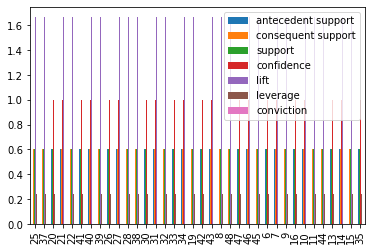

In [16]:
result1.plot(kind='bar')

<AxesSubplot:>

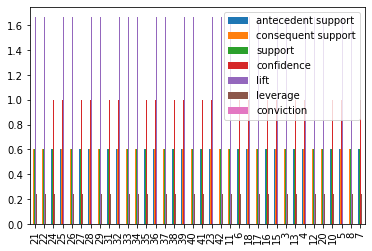

In [17]:
result2.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

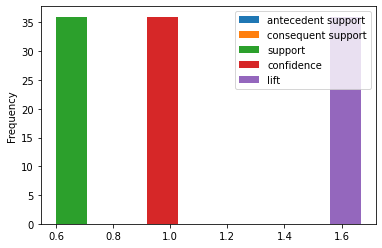

In [18]:
result1.iloc[:,0:7].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

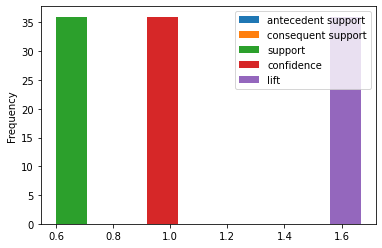

In [19]:
result2.iloc[:,1:7].plot(kind='hist')